# Exploratory Data Analysis

The code in this notebook was used for the exploratory data analysis part of the results/discussion section of the thesis.

Disclaimer: some of the plots are very large for the sake of posters.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from scipy.stats import anderson_ksamp
from umap import UMAP

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 25
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("data/parsed_data.csv")
df

,t,Steps,Event,idx,TFSI,TFSI-flip,EC,EC-flip,Li,Li-flip,...,EC-2-flip,Li-2,Li-2-flip,dx,dy,dz,dr,d,fast,system
0,459.0,306,1,1.0,0.0,78,4.0,50,0.0,0,...,147,0.0,0,-0.02,-1.10,-0.73,1.32,243.13,0.0,B2T1
1,459.0,306,1,2.0,2.0,122,3.0,80,0.0,106,...,164,1.0,110,1.05,-0.61,-0.49,1.31,250.02,0.0,B2T1
2,459.0,306,1,3.0,2.0,99,2.0,104,0.0,8,...,195,1.0,76,-0.27,0.40,0.92,1.04,251.00,0.0,B2T1
3,459.0,306,1,4.0,1.0,125,3.0,6,0.0,0,...,125,0.0,0,0.47,0.05,0.59,0.76,203.19,0.0,B2T1
4,459.0,306,1,5.0,0.0,0,4.0,38,0.0,0,...,162,0.0,16,1.51,1.04,-0.15,1.84,247.00,0.0,B2T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24895,8721.0,5814,19,96.0,2.0,41,2.0,18,0.0,3,...,60,0.0,50,0.98,-3.90,-1.55,4.31,344.49,1.0,B8T5
24896,8721.0,5814,19,97.0,3.0,164,1.0,9,0.0,0,...,127,1.0,39,-6.13,3.94,-1.87,7.52,347.39,1.0,B8T5
24897,8721.0,5814,19,98.0,2.0,16,2.0,6,0.0,0,...,31,0.0,0,-0.31,0.77,0.09,0.83,335.26,0.0,B8T5
24898,8721.0,5814,19,99.0,0.0,29,4.0,31,0.0,0,...,64,0.0,0,-1.63,1.24,-0.01,2.05,336.03,0.0,B8T5


In [3]:
columns = [
    "TFSI",
    "TFSI-flip",
    "EC",
    "EC-flip",
    "Li",
    "Li-flip",
    "TFSI-2",
    "TFSI-2-flip",
    "EC-2",
    "EC-2-flip",
    "Li-2",
    "Li-2-flip",
    "dr",
]

data = df[columns]

structure = ["EC", "EC-2", "Li", "Li-2", "TFSI", "TFSI-2"]
flips = ["EC-flip", "EC-2-flip", "Li-flip", "Li-2-flip", "TFSI-flip", "TFSI-2-flip"]

## Correlation Heatmap

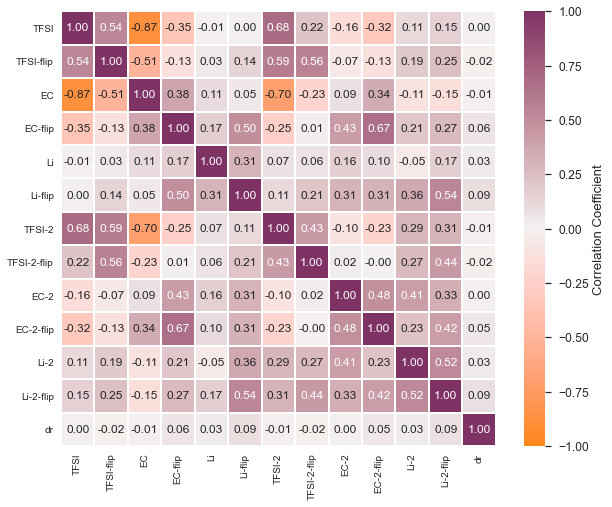

In [4]:
# cell needs to be run twice for seaborn's font scaling?
colors = [
    "#7f3365",
    "#a2607d",
    "#c18e9c",
    "#dcbec2",
    "#f3f0f0",
    "#ffd1ca",
    "#ffb49b",
    "#ff9a63",
    "#ff8619",
]
custom_cmap = LinearSegmentedColormap.from_list(colors=colors, name="purple_to_orange")

fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.1)
sns.heatmap(
    df[df.columns[[i for i in range(4,16)] + [19]]].corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap=custom_cmap.reversed(),
    linewidths=2,
    cbar_kws={"label": "Correlation Coefficient"},
    ax=ax,
    fmt=".2f",
    annot_kws={"size": 12},
    square=True
)
# plt.savefig('figures/annot_correlation_matrix.png', dpi=400, bbox_inches="tight")
plt.show()

## Distribution of Target Across Systems

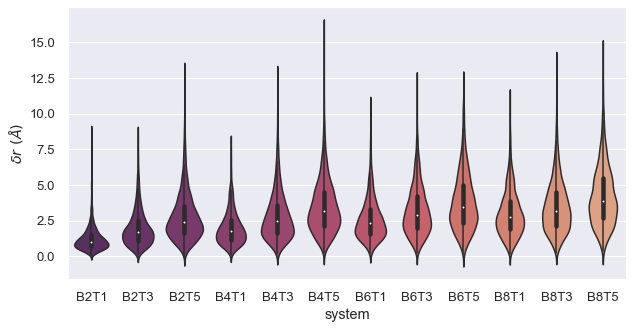

In [5]:
# graph distributions of dr across 12 systems
sns.set(style="darkgrid", font_scale=1.2)
fig = plt.figure(figsize=(10, 5))
sns.violinplot(
    data=df, x="system", y="dr", palette="flare_r", scale="count",
)
plt.ylabel(r"$\delta r\ (\AA)$")
plt.show()

## Distributions of Coordination Number Across Systems

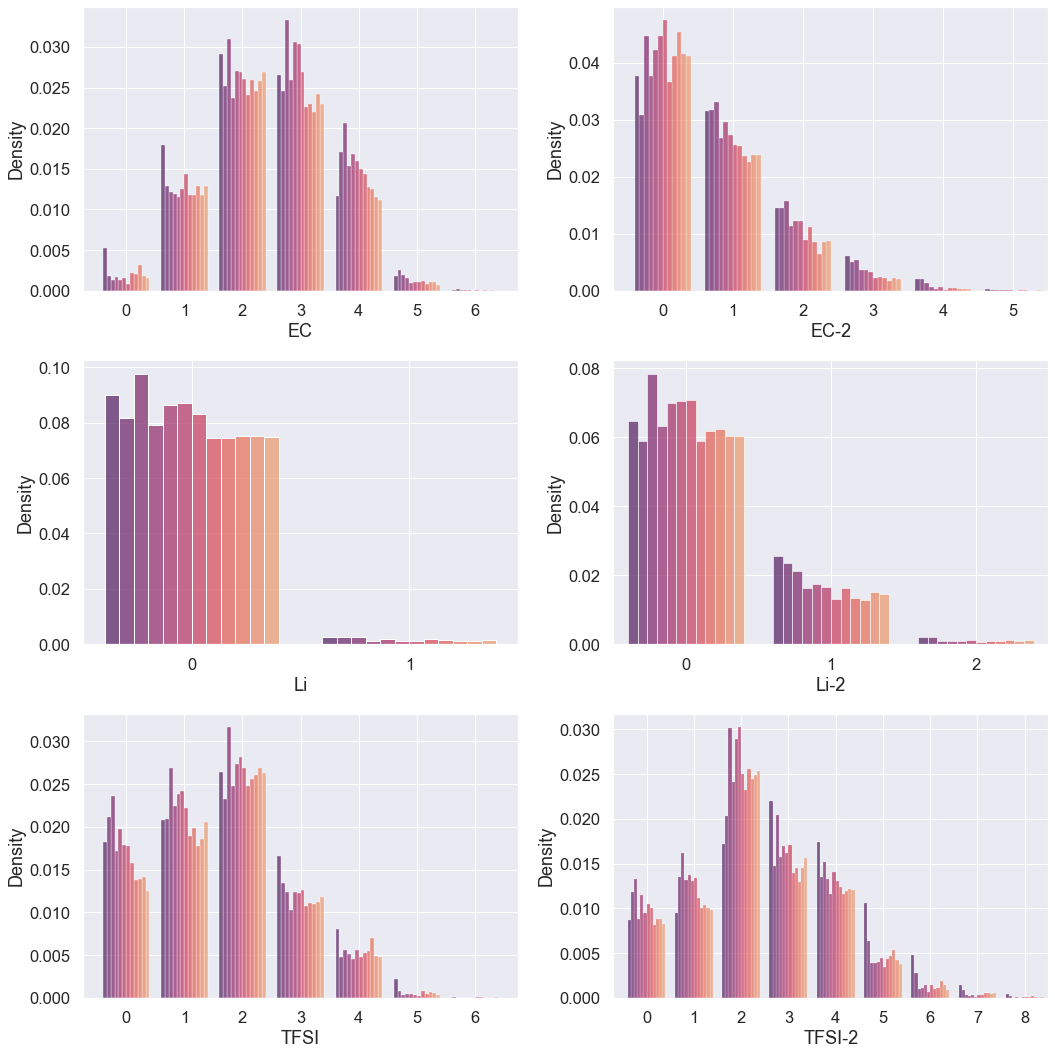

In [6]:
from matplotlib.ticker import FuncFormatter

sns.set(style="darkgrid", font_scale=1.5)
fig = plt.figure(figsize=(15, 15))
for i, col in enumerate(structure, 1):
    plt.subplot(3, 2, i)
    ax = sns.histplot(
        data=df,
        x=col,
        hue="system",
        multiple="dodge",
        discrete=True,
        binwidth=1,
        bins=4,
        palette="flare_r",
        shrink=0.8,
        common_norm=True,
        stat="density",
        legend=True,
    )
    if col == "EC-2":
        plt.xlim(-0.7, 5.5)
    if col == "Li":
        plt.xlim(-0.5, 1.5)
        plt.xticks([0, 1])
    if col == "Li-2":
        plt.xlim(-0.5, 2.5)
        plt.xticks([0, 1, 2])
    if col == "TFSI-2":
        plt.xlim(-0.7, 8.5)
        plt.xticks(list(range(0, 9)))
    ax.get_legend().remove()  # remove legend from each
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))  # int axis labels

fig.tight_layout()
# plt.savefig('figures/hist_new.png', dpi=400, bbox_inches="tight")
plt.show()

## Distributions of Changes in Coordination Number Across Systems

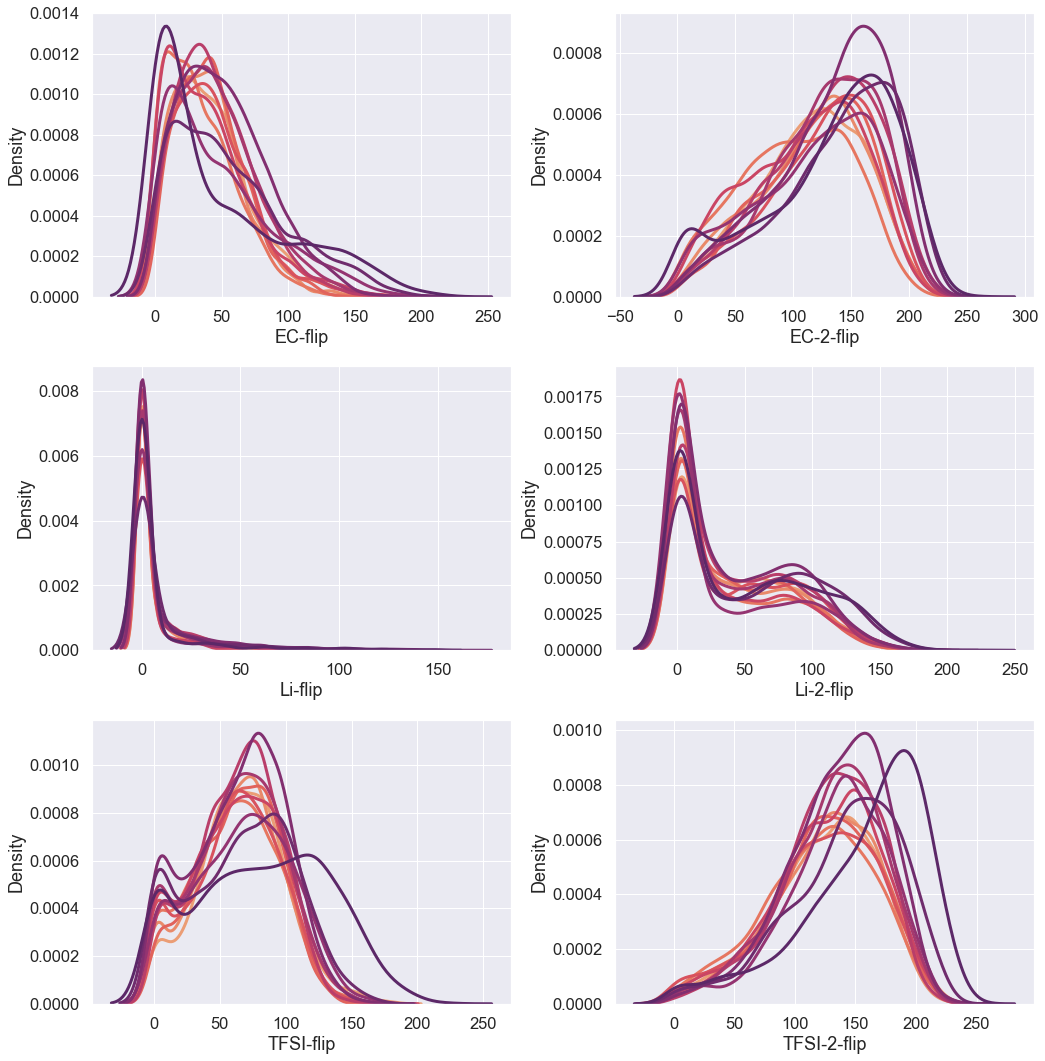

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
sns.set(style="darkgrid", font_scale=1.5)
for i, ax in zip(flips, axes.flat):
    sns.kdeplot(
        data=df,
        x=i,
        hue="system",
        palette="flare_r",
        linewidth=3,
        common_norm=True,
        alpha=0.8,
        ax=ax,
    )
    ax.get_legend().remove()
fig.tight_layout()
# plt.savefig('figures/kde_new.png', dpi=400, bbox_inches="tight")
plt.show()

## Quantifying Dissimilarity of Distributions

EC


C:\Users\khanm\AppData\Local\Temp/ipykernel_28204/1036564768.py:12: UserWarning: p-value capped: true value larger than 0.25
  test = anderson_ksamp(
C:\Users\khanm\AppData\Local\Temp/ipykernel_28204/1036564768.py:12: UserWarning: p-value floored: true value smaller than 0.001
  test = anderson_ksamp(


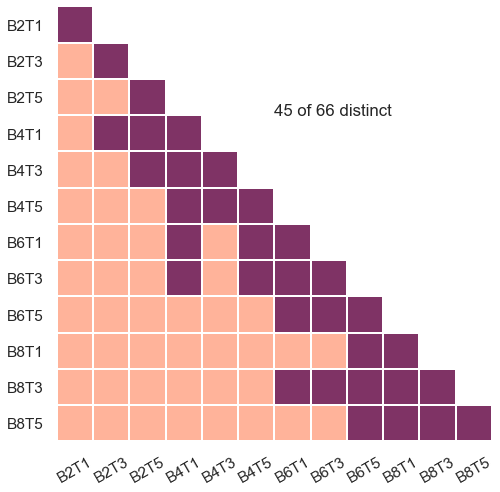

EC-2


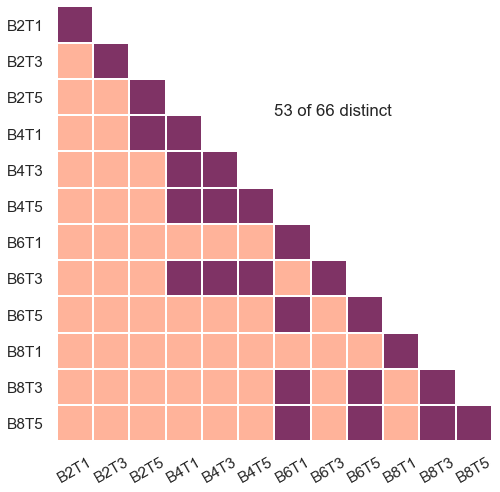

Li


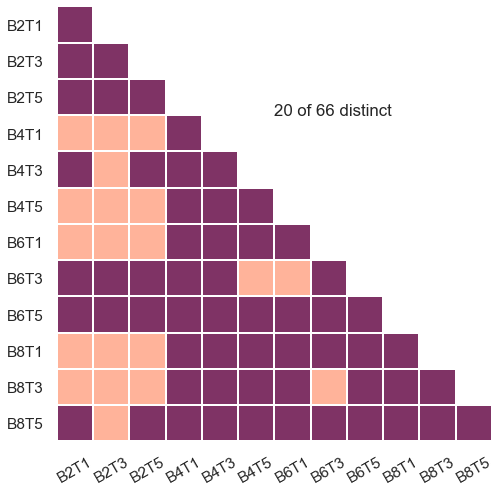

Li-2


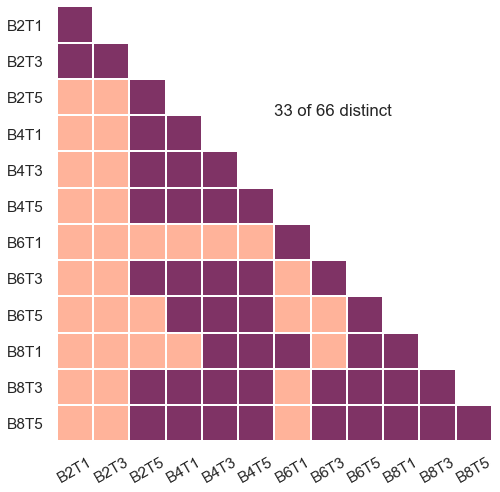

TFSI


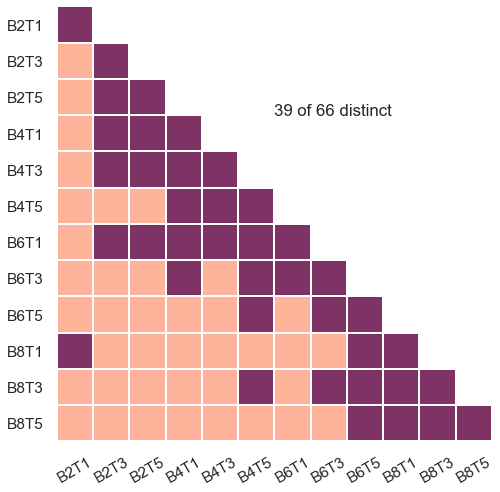

TFSI-2


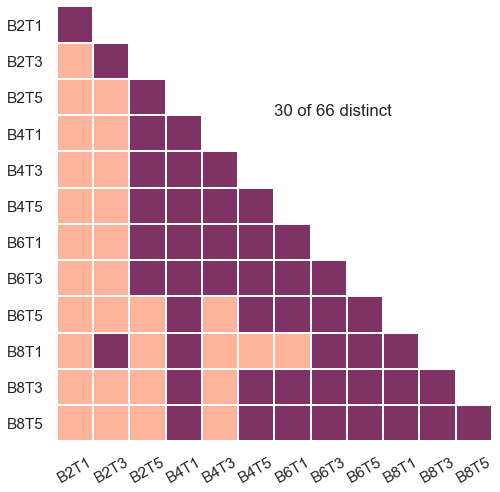

EC-flip


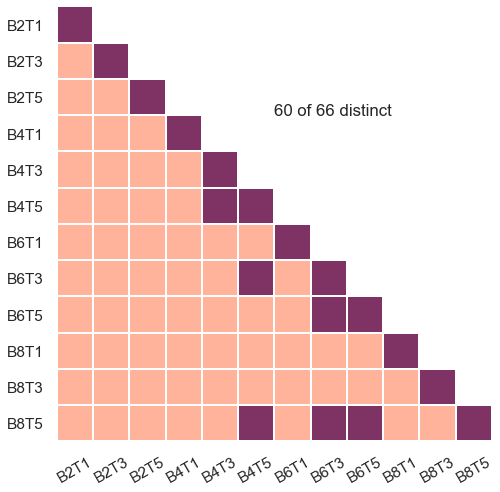

EC-2-flip


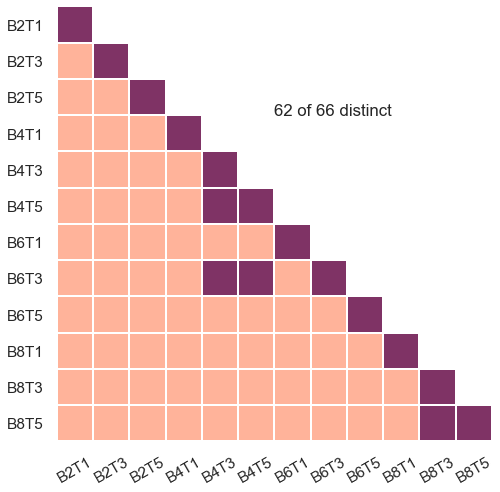

Li-flip


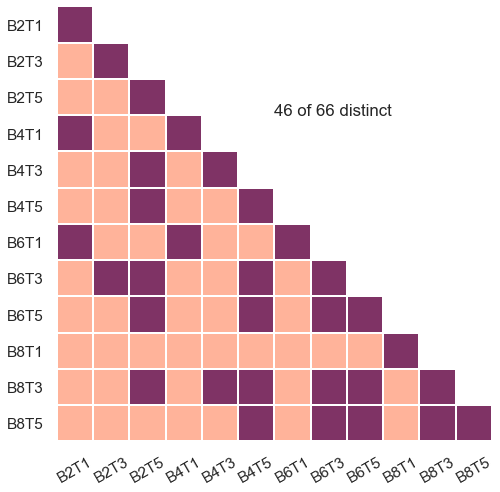

Li-2-flip


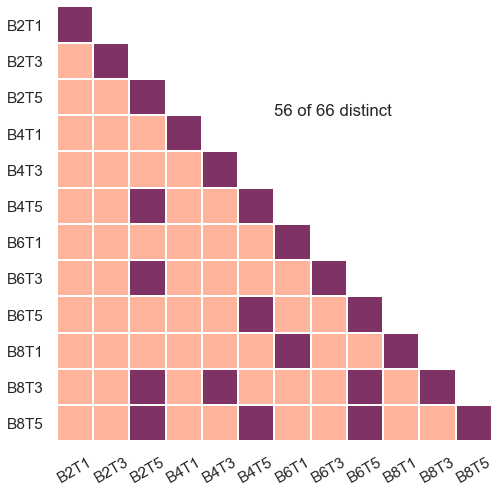

TFSI-flip


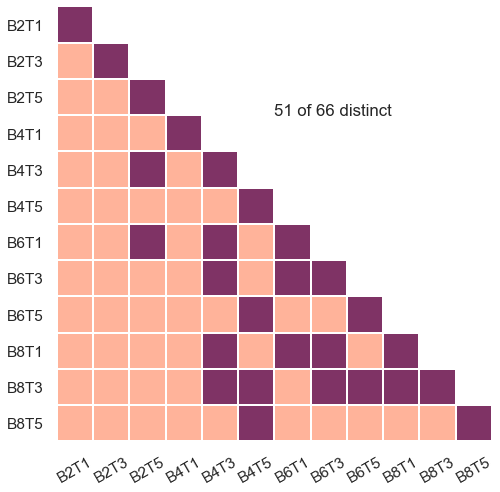

TFSI-2-flip


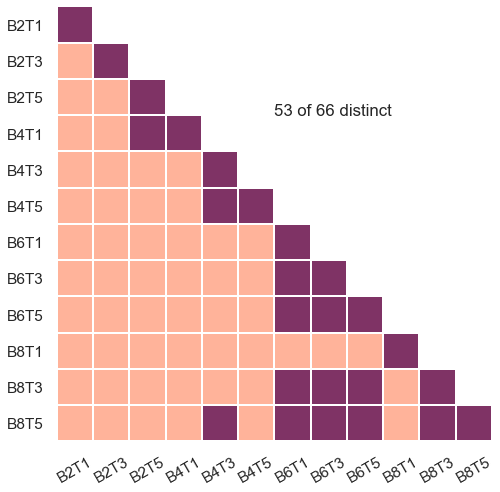

dr


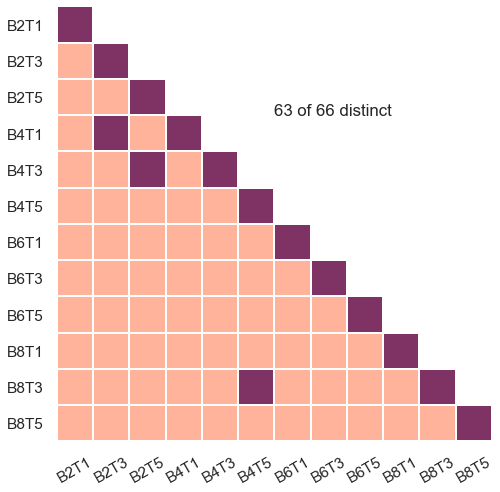

In [8]:
cols = df.system.unique()
rows = df.system.unique()

sns.set(font_scale=1.4, style="white")
features = structure + flips + ["dr"]
for feat in features:
    print(feat)
    zeros = np.zeros((12, 12))
    zeros_ks = np.zeros((12, 12))
    for i, col in enumerate(cols):
        for j, row in enumerate(rows):
            test = anderson_ksamp(
                [df[feat][df.system == col], df[feat][df.system == row]]
            )
            zeros[i, j] = test.statistic >= test.critical_values[5]
    mask = np.triu(np.ones_like(zeros, dtype=bool))
    np.fill_diagonal(mask, False)
    plt.figure(figsize=(8, 8))
    sns.heatmap(
        pd.DataFrame(zeros, index=rows, columns=cols),
        vmin=0.15,
        vmax=0.30,
        center=0.25,
        cmap=custom_cmap,
        linewidths=2,
        cbar=False,
        square=True,
        mask=mask,
    )
    # plt.title(feat)
    not_colored = int(zeros.sum() / 2)
    plt.text(6, 3, f"{not_colored} of 66 distinct")
    plt.yticks(rotation=0)
    plt.xticks(rotation=30)
    # plt.savefig(f"figures/anderson_{feat}.png", dpi=400, bbox_inches="tight")
    plt.show()

## UMAP Embeddings of Data

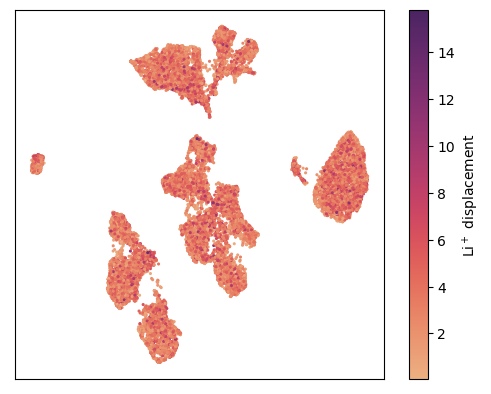

In [9]:
scaler = StandardScaler()
X = data.iloc[:, :-1]
X_scaled = scaler.fit_transform(X)
umap = UMAP(random_state=42)
embedding = umap.fit_transform(X_scaled)

plt.style.use("default")
emb_df = pd.DataFrame(
    {"UMAP_1": embedding[:, 0], "UMAP_2": embedding[:, 1], "dr": df["dr"]}
)
norm = plt.Normalize(emb_df['dr'].min(), emb_df['dr'].max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)
sm.set_array([])
ax = sns.scatterplot(
    data=emb_df,
    x="UMAP_1",
    y="UMAP_2",
    hue="dr",
    # alpha=0.5,
    legend="full",
    edgecolor="none",
    palette="flare",
    s=5,
)
ax.get_legend().remove()
ax.set_box_aspect(1)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.figure.colorbar(sm, label=r"Li$^+$ displacement")
# plt.savefig('figures/umap.png', dpi=400, bbox_inches="tight")
plt.show()

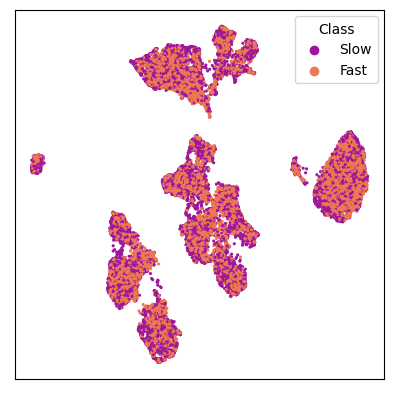

In [10]:
emb_df = pd.DataFrame(
    {
        "UMAP_1": embedding[:, 0],
        "UMAP_2": embedding[:, 1],
        "Class": df["fast"].map({0.0: "Slow", 1.0: "Fast"}),
    }
)
ax = sns.scatterplot(
    data=emb_df,
    x="UMAP_1",
    y="UMAP_2",
    hue="Class",
    edgecolor="none",
    palette="plasma",
    s=5,
)
ax.set_box_aspect(1)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.savefig('figures/umap_class.png', dpi=400, bbox_inches="tight")
plt.show()